<h1 align="center" style="background-color: lightgreen; color: black; padding: 10px; border: 2px solid black; text-shadow: 2px 2px 4px rgba(0,0,0,0.3), 0 0 25px rgba(0, 255, 0, 0.7);">
  Zomato Restaurant Trends Analysis
</h1>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Load And Read Data
</h3>


In [2]:
data=pd.read_csv('/kaggle/input/car-price-dataset/car_price_dataset.csv')

In [3]:
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  View Data
</h3>


In [4]:
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [5]:
data.columns

Index(['Brand', 'Model', 'Year', 'Engine_Size', 'Fuel_Type', 'Transmission',
       'Mileage', 'Doors', 'Owner_Count', 'Price'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [7]:
data.dtypes

Brand            object
Model            object
Year              int64
Engine_Size     float64
Fuel_Type        object
Transmission     object
Mileage           int64
Doors             int64
Owner_Count       int64
Price             int64
dtype: object

<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  EDA 
</h3>


In [8]:
data['Owner_Count'].unique()

array([5, 3, 2, 1, 4])

In [9]:
data['Transmission'].unique()

array(['Manual', 'Automatic', 'Semi-Automatic'], dtype=object)

In [10]:
data['Doors'].unique()

array([3, 2, 4, 5])

In [11]:
data['Fuel_Type'].unique()

array(['Diesel', 'Hybrid', 'Electric', 'Petrol'], dtype=object)

In [12]:
data['Model'].unique()

array(['Rio', 'Malibu', 'GLA', 'Q5', 'Golf', 'Camry', 'Civic', 'Sportage',
       'RAV4', '5 Series', 'CR-V', 'Elantra', 'Tiguan', 'Equinox',
       'Explorer', 'A3', '3 Series', 'Tucson', 'Passat', 'Impala',
       'Corolla', 'Optima', 'Fiesta', 'A4', 'Focus', 'E-Class', 'Sonata',
       'C-Class', 'X5', 'Accord'], dtype=object)

In [13]:
data.isnull().sum()

Brand           0
Model           0
Year            0
Engine_Size     0
Fuel_Type       0
Transmission    0
Mileage         0
Doors           0
Owner_Count     0
Price           0
dtype: int64

In [14]:
data.duplicated().sum()

0

In [15]:
data

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867
...,...,...,...,...,...,...,...,...,...,...
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084


<Axes: xlabel='Mileage'>

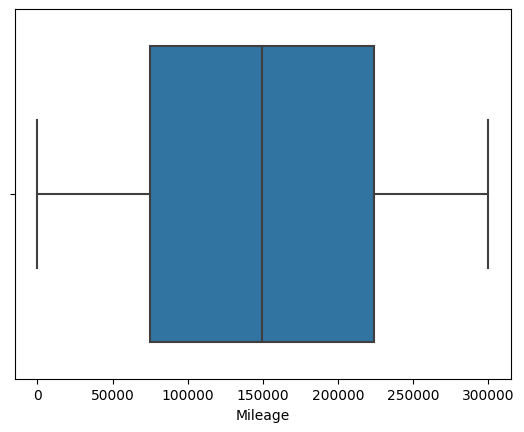

In [16]:
sns.boxplot(x='Mileage',data=data)

<Axes: xlabel='Price'>

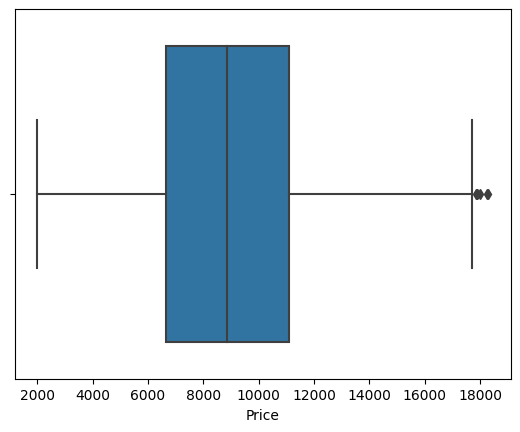

In [17]:
sns.boxplot(x='Price',data=data)

<h3 style="background-color: black; border: 2px solid black; color: white; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Observation: Car Price Outliers
</h3>
<p>
  It is a normal observation that there are price outliers in the car dataset. Some cars are priced significantly higher than others, which indicates the presence of very expensive car models. These outliers could be due to factors such as brand, model, features, and rarity of the vehicle.
</p>


<h3 style="background-color: pink; border: 2px solid black; color: black; display: inline-block; padding: 10px; text-align: left; margin: 0;">
  Data Visualization
</h3>


<Axes: ylabel='count'>

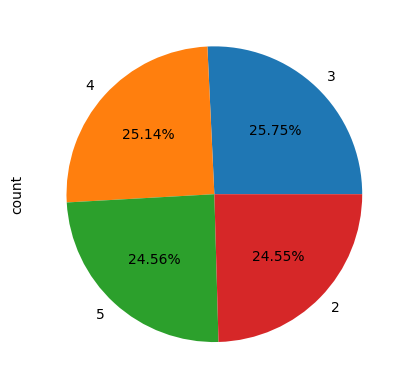

In [18]:
data['Doors'].value_counts().plot.pie(autopct='%.2f%%')

<Axes: ylabel='count'>

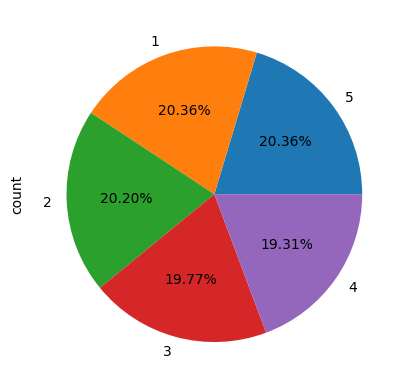

In [19]:
data['Owner_Count'].value_counts().plot.pie(autopct='%.2f%%')

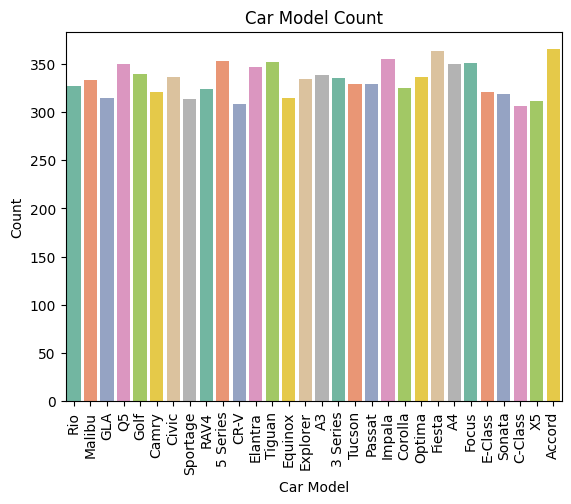

In [20]:
sns.countplot(x='Model', data=data, palette='Set2')
plt.title('Car Model Count')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

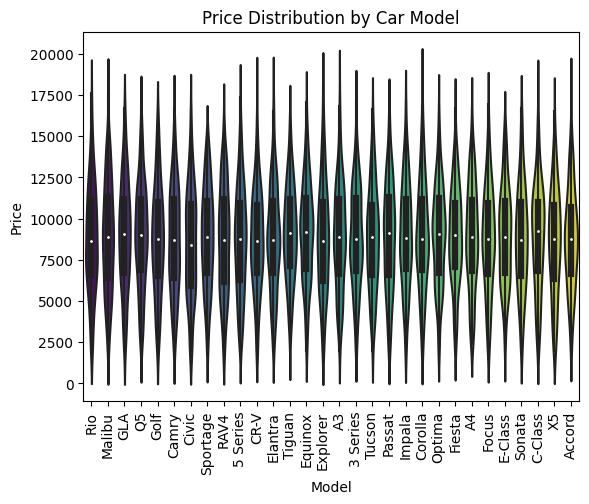

In [21]:
sns.violinplot(x='Model', y='Price', data=data, palette='viridis')
plt.title('Price Distribution by Car Model')
plt.xlabel('Model')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()